In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style="darkgrid")

import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 10),
          'axes.labelsize': 'small',
          'axes.titlesize':'small',
          'xtick.labelsize':'xx-small',
          'ytick.labelsize':'xx-small'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600 #(long description)
pd.set_option('display.max_columns', 500)


np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']
np.set_printoptions(precision=4)


pd.set_option('display.max_rows', 500)

pd.set_option('display.width', 1000)
    


In [25]:
df=pd.read_csv('veris_premodel.csv')

In [26]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,NaN,NaN,NaN,0
1,PA,healthcare,NaN,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,NaN,server,database,0.0,4.0,NaN,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,NaN,NaN,NaN,NaN,0
3,OH,government,3.0,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0.0,NaN,NaN,NaN,NaN,0
4,NaN,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,NaN,NaN,2.0,0


In [27]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [28]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
state,202,11.2


In [29]:
df=df.drop(columns=['state','incident_year'])

In [30]:
df_dum=pd.get_dummies(df)

In [31]:
df_dum.fillna(-999, inplace=True)

In [32]:
df_dum.head()

,n_employees,confidence,availability_duration,discovery,containment,exfiltration,time_compromise,actor,industry_ASWMR,industry_PST,industry_accomodation and food,industry_agriculture & animal,industry_construction,industry_consultation/service,industry_education,industry_entertainment,industry_finance and insurance,industry_government,industry_healthcare,industry_information telecom,industry_information/ app,industry_manufacturing,industry_military,industry_mining,industry_personal service,industry_rental and leasing,industry_retail trade,industry_transportation,industry_utilities,industry_wholesale,attribute_availability,attribute_confidentiality,attribute_integrity,compromise_alter behavior,compromise_created account,compromise_data loss,compromise_defacement,compromise_degradation,compromise_destruction,compromise_fraudulent transaction,compromise_hardware tampering,compromise_interruption,compromise_log tampering,compromise_loss,compromise_misrepresentation,compromise_missappropriation,compromise_modify configuration,compromise_modify data,compromise_modify privileges,compromise_other,compromise_repurpose,compromise_software installation,data_disclosure_no,data_disclosure_yes,action_environment,action_error,action_hacking,action_malware,action_misuse,action_physical,action_social,action_variety_abuse of functionality,action_variety_adware,action_variety_assault,action_variety_backdoor,action_variety_brute force,action_variety_bypassed controls,action_variety_c2,action_variety_cache poisoning,action_variety_capture app data,action_variety_capture stored data,action_variety_carelessness,action_variety_classification error,action_variety_click fraud and cryptocurrency mining,action_variety_client-side attack,action_variety_data mishandling,action_variety_destroy data,action_variety_disabled controls,action_variety_disposal error,action_variety_dos,action_variety_elevate,action_variety_email attachment,action_variety_email misuse,action_variety_exfiltrate,action_variety_exploit vuln,action_variety_export data,action_variety_extortion,action_variety_flood,action_variety_footprinting,action_variety_forced browsing,action_variety_forgery,action_variety_gaffe,action_variety_illicit content,action_variety_inadequate processes,action_variety_influence,action_variety_knowledge abuse,action_variety_lan access,action_variety_loss,action_variety_maintenance error,action_variety_malfunction,action_variety_misconfiguration,action_variety_misdelivery,action_variety_misinformation,action_variety_net misuse,action_variety_omission,action_variety_path traversal,action_variety_phishing,action_variety_physical access,action_variety_possession abuse,action_variety_pretexting,action_variety_privilege abuse,action_variety_programming error,action_variety_publishing error,action_variety_ram scraper,action_variety_ransomware,action_variety_session prediction,action_variety_skimmer,action_variety_snooping,action_variety_spam,action_variety_spyware/keylogger,action_variety_sqli,action_variety_ssi injection,action_variety_surveillance,action_variety_tampering,action_variety_theft,action_variety_unapproved hardware,action_variety_unapproved software,action_variety_use of backdoor or c2,action_variety_use of stolen creds,action_variety_worm,action_variety_xss,action_vector_backdoor or c2,action_vector_carelessness,action_vector_command shell,action_vector_desktop sharing,action_vector_desktop sharing software,action_vector_direct install,action_vector_download by malware,action_vector_email,action_vector_humidity,action_vector_in-person,action_vector_inadequate personnel,action_vector_inadequate processes,action_vector_inadequate technology,action_vector_lan access,action_vector_network propagation,action_vector_non-corporate,action_vector_partner,action_vector_partner facility,action_vector_partner vehicle,action_vector_personal residence,action_vector_personal vehicle,action_vector_phone,action_vector_physical access,action_vector_privileged access,act

In [33]:
df_dum.shape

(1806, 254)

In [229]:
X=df_dum.drop(columns='actor')
y=df_dum.actor

## Libraries

In [230]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,roc_curve,recall_score, roc_auc_score,accuracy_score,precision_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from pprint import pprint
from sklearn.model_selection import GridSearchCV

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51, stratify=y)

In [232]:
def find_best_threshold(model, X_value, y_value, num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, num_steps):
        y_predict = (model.predict_proba(X_value)[:, 1] >= threshold) 
        f1 = f1_score(y_value,y_predict)
        acc = accuracy_score(y_value,y_predict)
        rec = recall_score(y_value,y_predict)
        pre = precision_score(y_value,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
            
        
            
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [233]:
def scores_test(sampling, sampling_name):

    sampling=sampling
    sampling_name= sampling_name
    scores=[]

    
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(sampling,X_test,y_test,100)
    scores.append([sampling_name, best_thresh, high_f1, high_acc, high_rec, high_pre])


    score=pd.DataFrame(scores, columns=['Sampling', 'Best Threshold','F1 Score','Accuracy', 'Recall','Precision'])
    return score

In [234]:
def adjusted_classes(prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in prob]

def precision_recall_threshold_test(fpr, tpr, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(prob, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(tpr, fpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(tpr, fpr, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.05, 1.01]);
    plt.xlim([0.05, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(tpr[close_default_clf], fpr[close_default_clf], '^', c='k',
            markersize=15)

In [235]:
rf=RandomForestClassifier(class_weight='balanced', random_state=51)

In [236]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=51)

In [237]:
prediction=rf.predict(X_test)

In [238]:

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       352
           1       0.75      0.60      0.67        10

    accuracy                           0.98       362
   macro avg       0.87      0.80      0.83       362
weighted avg       0.98      0.98      0.98       362

Confusion matrix:
 [[350   2]
 [  4   6]]


In [239]:
prob=rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.9538352272727273

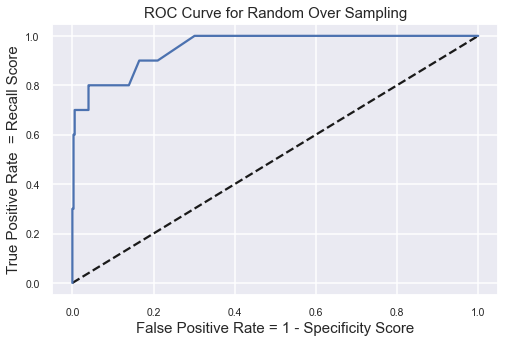

In [240]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for Random Over Sampling')
plt.show()

In [241]:
scores_test(rf, 'Random Forest')



,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Forest,0.373737,0.736842,0.986188,0.7,0.777778


In [242]:
notuned=scores_test(rf, 'Random Forest')

     pred_neg  pred_pos
neg       350         2
pos         3         7


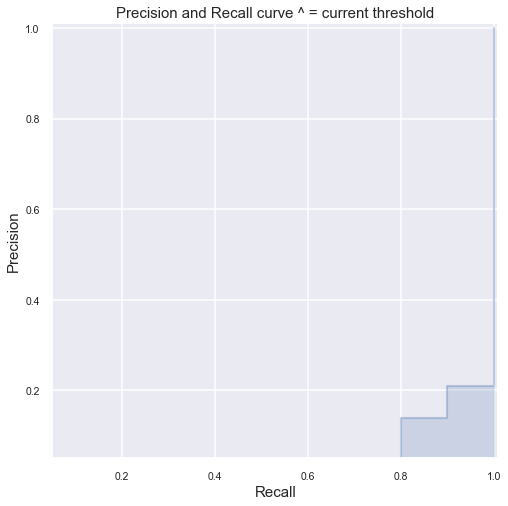

In [243]:
precision_recall_threshold_test(fpr, tpr, thresholds, t=0.37379)

## GridsearchCV

In [244]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 51,
 'verbose': 0,
 'warm_start': False}


In [245]:
param_grid={'max_depth':[6,12,24],
            
            
            'max_features':['log2', 'sqrt', 'auto'],
            'min_samples_leaf':[4,6,12],
            'n_estimators':[300,400],
            'random_state':[51],
            'min_samples_split': [4,6,12],
            'class_weight':['balanced']
            
           }

rfc=RandomForestClassifier(random_state=51)
grid = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

In [246]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=51), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [6, 12, 24],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [4, 6, 12],
                         'min_samples_split': [4, 6, 12],
                         'n_estimators': [300, 400], 'random_state': [51]})

In [247]:
grid.best_estimator_


RandomForestClassifier(class_weight='balanced', max_depth=24,
                       max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=4, n_estimators=300, random_state=51)

In [248]:
model=grid.best_estimator_

In [249]:
prediction=model.predict(X_test)

In [250]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       352
           1       0.26      0.80      0.39        10

    accuracy                           0.93       362
   macro avg       0.63      0.87      0.68       362
weighted avg       0.97      0.93      0.95       362

Confusion matrix:
 [[329  23]
 [  2   8]]


In [251]:
prob=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.9644886363636364

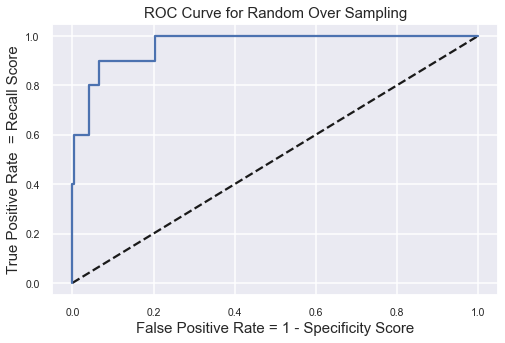

In [252]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for Random Over Sampling')
plt.show()

In [253]:
scores_test(model, 'Random Forest Tuned')



,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Forest Tuned,0.69697,0.705882,0.986188,0.6,0.857143


In [254]:
tuned=scores_test(model, 'Random Forest Tuned')

     pred_neg  pred_pos
neg       351         1
pos         4         6


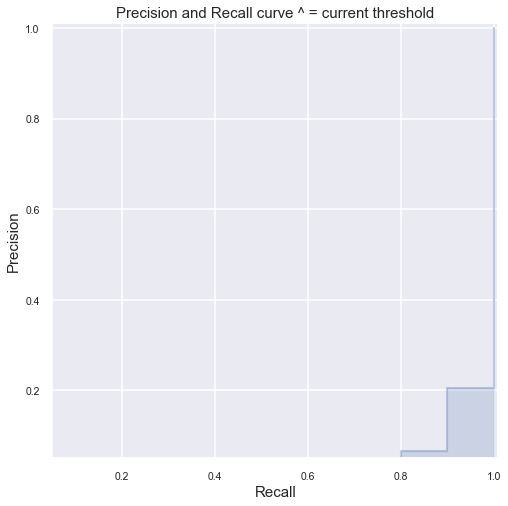

In [255]:
precision_recall_threshold_test(fpr, tpr, thresholds, t=0.6979)

In [256]:
comparison=pd.concat([notuned, tuned], axis=0)

In [257]:
comparison=comparison.reset_index()

In [258]:
comparison.drop(columns='index', inplace=True)

In [259]:
comparison

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Forest,0.373737,0.736842,0.986188,0.7,0.777778
1,Random Forest Tuned,0.696970,0.705882,0.986188,0.6,0.857143


## ROC Curves

In [286]:
def roc_scores(X_value, Y_value):
    #in sample
    model_list = [rf, 
                 grid.best_estimator_]

    model_name = ['Random Forest','Random Forest Tuned']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(10,10))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 20,
                   grid_color='black', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 20})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=20)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02,])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

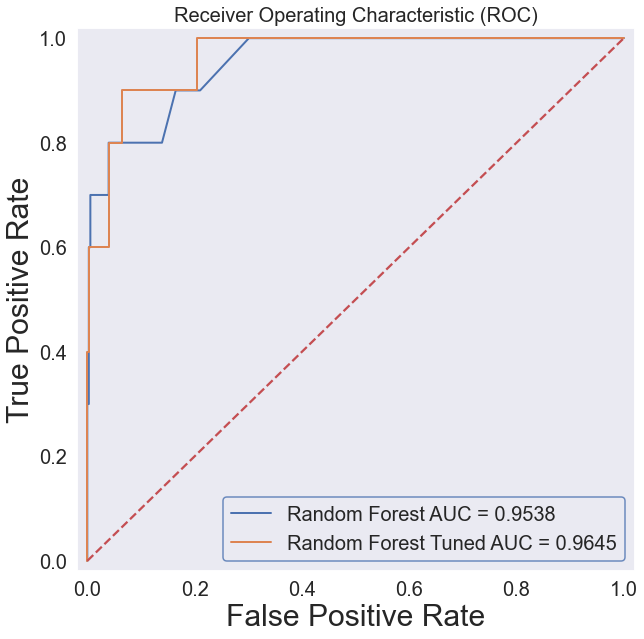

In [287]:
roc_scores(X_test,y_test)